In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
crypto = 'crypto_data.csv'

crypto_df = pd.read_csv(crypto)
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
labels = crypto_df['Algorithm']
print(labels.items)

<bound method Series.items of 0        Scrypt
1           X11
2        Scrypt
3       SHA-256
4       SHA-256
         ...   
1247     Scrypt
1248     Scrypt
1249     Scrypt
1250    SHA-256
1251        PoS
Name: Algorithm, Length: 1252, dtype: object>


In [5]:
crypto_df = crypto_df[crypto_df['IsTrading'] == True]
crypto_df = crypto_df.dropna(axis=0)
crypto_df = crypto_df[crypto_df['TotalCoinsMined'] > 0]
crypto_df = crypto_df.drop(columns = ['CoinName', 'IsTrading'])
crypto_df

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [6]:
temp_df = pd.DataFrame(crypto_df[['Algorithm','ProofType']])
temp_df = pd.get_dummies(temp_df)
temp_df

,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
crypto_dummies = pd.concat([crypto_df, temp_df.reindex(crypto_df.index)], axis=1)
crypto_dummies = crypto_dummies.drop(columns = ['Algorithm', 'ProofType', 'Unnamed: 0'])

In [8]:
crypto_scaled = StandardScaler().fit_transform(crypto_dummies)
crypto_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [9]:
pca = PCA(n_components = .90)
crypto_pca = pca.fit_transform(crypto_scaled)
crypto_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         9.59739281e-16,  1.97575530e-15, -3.71605237e-15],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         5.43061254e-16,  1.99779328e-15, -3.11626968e-15],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
         3.54476800e-16, -4.32593747e-14,  1.65758952e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
        -6.75451531e-15, -2.68400098e-14, -3.09519451e-14],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
        -2.98168844e-15,  1.40929630e-15,  2.00083429e-15],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
        -2.01376397e-16, -1.84880272e-16,  9.16676431e-16]])

In [10]:
from sklearn.manifold import TSNE

In [11]:
crypto_pca_df = pd.DataFrame(data=crypto_pca)
crypto_pca_df

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-2.283066e-14,-1.997025e-14,7.900266e-12,-0.007129,-1.319756,-0.051813,...,-2.368958e-15,-1.445089e-15,-4.418027e-15,3.772304e-15,-3.592104e-15,-8.706285e-15,-3.133180e-15,9.597393e-16,1.975755e-15,-3.716052e-15
1,-0.318434,1.032331,-0.591126,0.001386,-2.295626e-14,-2.003594e-14,7.835457e-12,-0.007739,-1.322514,-0.056674,...,-1.116486e-15,-1.711730e-15,-4.312173e-15,3.969410e-15,-3.877941e-15,-8.881044e-15,-3.547644e-15,5.430613e-16,1.997793e-15,-3.116270e-15
2,2.305468,1.656383,-0.683617,0.004731,-3.256411e-14,-2.971927e-14,2.680680e-11,-0.054781,-1.542879,-0.943951,...,1.027446e-13,-9.066971e-15,-2.310298e-15,-8.799507e-14,9.239465e-15,1.920804e-13,6.046412e-14,3.544768e-16,-4.325937e-14,1.657590e-14
3,-0.145184,-1.320593,0.192813,-0.001229,7.310566e-15,6.192184e-15,-6.960586e-12,-0.002071,0.281463,0.251862,...,1.471950e-14,4.186262e-15,1.070382e-14,-1.352777e-14,1.961868e-15,3.440548e-14,4.677419e-15,-6.029707e-15,-1.208979e-14,2.350641e-15
4,-0.151768,-2.036192,0.396182,-0.001705,1.602225e-14,1.220564e-14,-9.659323e-12,0.027735,0.519099,0.188820,...,1.358106e-13,1.023453e-13,1.566598e-13,-2.339324e-14,-8.663380e-14,-4.885863e-14,-2.649536e-14,-4.654394e-14,-2.088812e-13,-9.403305e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,-6.528199e-15,-1.128230e-14,-4.666657e-11,-0.851713,2.041159,3.560713,...,1.800315e-14,5.575873e-15,1.402061e-14,-1.426969e-14,-2.641454e-15,3.275459e-14,1.151487e-16,-6.263445e-15,-1.170322e-14,2.017829e-16
528,-0.333144,1.032071,-0.590740,0.001399,-2.299502e-14,-2.014810e-14,7.913286e-12,-0.007154,-1.320125,-0.052460,...,-1.003550e-15,-1.496571e-15,-4.204774e-15,4.022906e-15,-3.785041e-15,-8.715105e-15,-3.223578e-15,4.688728e-16,2.064309e-15,-3.577532e-15
529,0.324349,-2.312308,0.421515,-0.001319,1.543393e-14,1.319746e-14,-7.462021e-12,0.017309,0.161077,-0.047787,...,3.861558e-14,1.579397e-14,5.791498e-14,7.296588e-15,-6.291798e-14,-9.314380e-15,-8.042659e-14,-6.754515e-15,-2.684001e-14,-3.095195e-14
530,-0.149364,-2.049336,0.412968,-0.001745,1.687891e-14,1.593595e-14,-9.877937e-12,0.028954,0.544389,0.233373,...,-4.112041e-16,-1.159743e-15,-9.868841e-16,1.285483e-15,3.261830e-15,1.954071e-16,1.364155e-15,-2.981688e-15,1.409296e-15,2.000834e-15


In [12]:
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(crypto_pca_df)

In [13]:
tsne_features.shape

(532, 2)

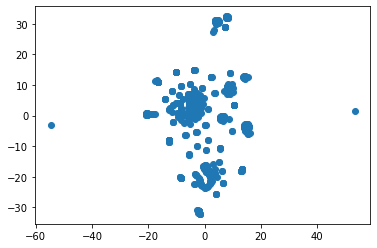

In [14]:
crypto_pca_df['x'] = tsne_features[:,0]
crypto_pca_df['y'] = tsne_features[:,1]
plt.scatter(crypto_pca_df['x'], crypto_pca_df['y'])
plt.show()

Looks like there are 3 distinct clusters. 

In [17]:
from sklearn.cluster import KMeans

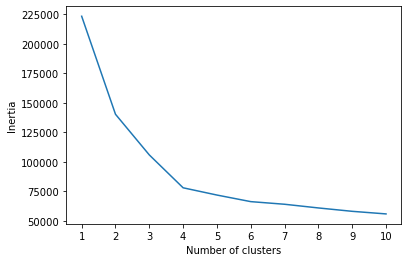

In [18]:
inertia = []

k = [1,2,3,4,5,6,7,8,9,10]

for i in k: 
    km = KMeans(n_clusters =i, random_state=0)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)
    
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

From these models, it looks as if there is a good chance the data can be clustered. The scatterplot from the t-SNE model showed three distinct clusters of data with some outliers, while the K-means plot showed that 4 clusters is optimal. 